In [4]:

import numpy as np

import scoobpsf
from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import *

import lina

from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

pupil_diam = 6.75*u.mm 
lyot_diam = 3.6*u.mm
det_rotation = -7.5 #  degrees of rotation of the detector relative to the optical axis

# The flattest wavefront obtained for the system in the lab by
# performing phase diversity
# dm_flat = fits.getdata(scoob.module_path/'scoob_dm_flat.fits')

wavelength_c = 632.8e-9*u.m # central wavelength
npix = 512
oversample = 8

vortex = scoobpsf.agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, singularity=20*u.um)
lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=lyot_diam/2.0)

Model using synthetic OPD data


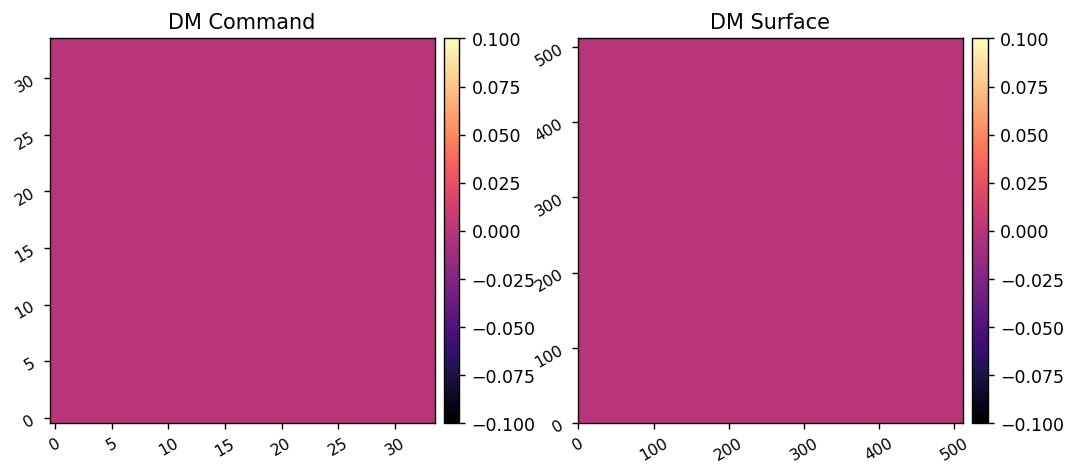

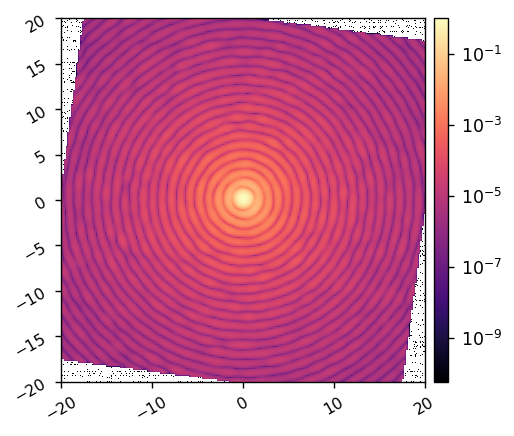

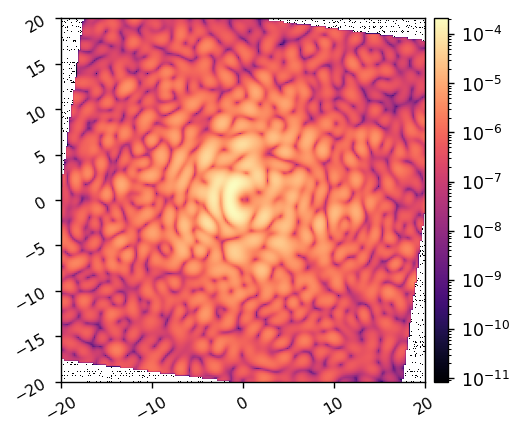

In [2]:
reload(scoobpsf.scoob)
full = scoobpsf.scoob.SCOOBM(npix=npix, 
                      oversample=oversample, 
                     npsf=200,
                      wavelength=wavelength_c, 
                      pupil_diam=pupil_diam,
                      det_rotation=det_rotation, 
                      use_synthetic_opds=True,
#                       dm_ref=dm_flat,
                     )

full.show_dm()

im0 = full.snap()
full.Imax_ref = im0.max()

ref_unocc_im = full.snap(plot=True)

full.FPM = vortex
full.LYOT = lyot_stop

ref_im = full.snap(plot=True)

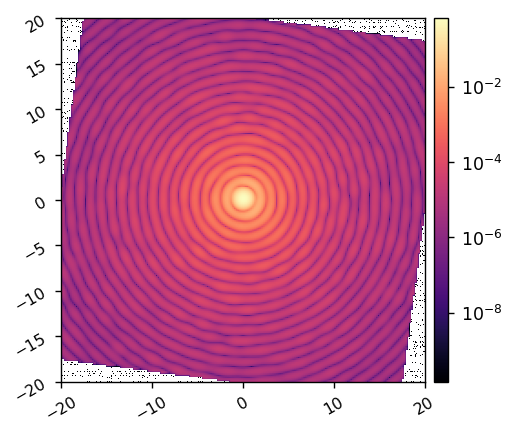

In [3]:
full.FPM = None

ref_unocc_im = full.snap(plot=True)

In [ ]:
fit_mask = 

In [5]:
reload(lina)
lina.phase_retrieval.fdpr(fit_mask, images, defocus_values, tol=1e-6, reg=0, wreg=10)

NameError: name 'fit_mask' is not defined